In [1]:
!pip install tiingo
!pip install --upgrade ta
from ta.trend import MACD as md

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=157ccb63aadaaeab565f407ec5fed59538149c28ae01a3cf31a0a85a0ee7cc03
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [2]:
# from config import API_KEY
API_KEY = 'e572e848ea6815b9a406e29401951beadd20c949'
import pandas as pd,plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "svg"
# import sweetviz as sv
import plotly.express as px


Obtaining Data

In [3]:
# Data Collection

from tiingo import TiingoClient
from datetime import datetime, timedelta

config = {
    'api_key': API_KEY,
    'session': True  # Use requests.Session
}
client = TiingoClient(config)

# Calculate the start date as today's date minus 2 years
end_date = datetime.now()
start_date = end_date - timedelta(days=10*365)

# Convert dates to string format
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

df = client.get_dataframe('MSFT', frequency='daily',startDate=start_date_str, endDate=end_date_str)

df.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2014-02-25 00:00:00+00:00,37.54,37.85,37.350,37.6100,30736500,31.792017,32.054551,31.631109,31.851299,30736500,0.0,1.0
2014-02-26 00:00:00+00:00,37.47,37.74,37.190,37.5801,41041800,31.732735,31.961394,31.495607,31.825977,41041800,0.0,1.0
2014-02-27 00:00:00+00:00,37.86,37.89,37.230,37.4500,33903400,32.063020,32.088426,31.529483,31.715797,33903400,0.0,1.0
2014-02-28 00:00:00+00:00,38.31,38.46,37.820,37.9800,41215000,32.444117,32.571150,32.029144,32.164646,41215000,0.0,1.0
2014-03-03 00:00:00+00:00,37.78,38.13,37.495,37.9200,29717500,31.995269,32.291678,31.753907,32.113833,29717500,0.0,1.0


In [4]:
df.reset_index(inplace=True)
df.rename(columns={'index': 'new_index'}, inplace=True)  # Rename the old index column
df['date'] = df['date'].dt.date  # Extract the date part from the datetime index
df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2014-02-25,37.54,37.85,37.350,37.6100,30736500,31.792017,32.054551,31.631109,31.851299,30736500,0.0,1.0
1,2014-02-26,37.47,37.74,37.190,37.5801,41041800,31.732735,31.961394,31.495607,31.825977,41041800,0.0,1.0
2,2014-02-27,37.86,37.89,37.230,37.4500,33903400,32.063020,32.088426,31.529483,31.715797,33903400,0.0,1.0
3,2014-02-28,38.31,38.46,37.820,37.9800,41215000,32.444117,32.571150,32.029144,32.164646,41215000,0.0,1.0
4,2014-03-03,37.78,38.13,37.495,37.9200,29717500,31.995269,32.291678,31.753907,32.113833,29717500,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2024-02-15,406.56,409.13,404.290,408.1400,21825525,406.560000,409.130000,404.290000,408.140000,21825525,0.0,1.0
2512,2024-02-16,404.06,408.29,403.440,407.9600,22296495,404.060000,408.290000,403.440000,407.960000,22296495,0.0,1.0
2513,2024-02-20,402.79,404.49,398.010,403.2400,24307915,402.790000,404.490000,398.010000,403.240000,24307915,0.0,1.0
2514,2024-02-21,402.18,402.29,397.220,400.1700,18631072,402.180000,402.290000,397.220000,400.170000,18631072,0.0,1.0


Exploratory Analysis

In [5]:
import pandas as pd
import ta
from ta.utils import dropna
from ta.volatility import BollingerBands

In [6]:
# # https://github.com/bukosabino/ta?tab=readme-ov-file
# indicator_bb = BollingerBands(close=df["adjClose"], window=20, window_dev=2)
# df['bb_bbm'] = indicator_bb.bollinger_mavg()
# df['bb_bbh'] = indicator_bb.bollinger_hband()
# df['bb_bbl'] = indicator_bb.bollinger_lband()

# Calculate MACD
macd_indicator = ta.trend.MACD(close=df['adjClose'], window_slow=26, window_fast=12, window_sign=9)

# Add MACD line to dataframe
df['MACD'] = macd_indicator.macd()

# Add MACD signal line to dataframe
df['MACD_signal'] = macd_indicator.macd_signal()

# Add MACD histogram to dataframe
df['MACD_histogram'] = macd_indicator.macd_diff()

# Display the updated dataframe
df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,MACD,MACD_signal,MACD_histogram
0,2014-02-25,37.54,37.85,37.350,37.6100,30736500,31.792017,32.054551,31.631109,31.851299,30736500,0.0,1.0,NaN,NaN,NaN
1,2014-02-26,37.47,37.74,37.190,37.5801,41041800,31.732735,31.961394,31.495607,31.825977,41041800,0.0,1.0,NaN,NaN,NaN
2,2014-02-27,37.86,37.89,37.230,37.4500,33903400,32.063020,32.088426,31.529483,31.715797,33903400,0.0,1.0,NaN,NaN,NaN
3,2014-02-28,38.31,38.46,37.820,37.9800,41215000,32.444117,32.571150,32.029144,32.164646,41215000,0.0,1.0,NaN,NaN,NaN
4,2014-03-03,37.78,38.13,37.495,37.9200,29717500,31.995269,32.291678,31.753907,32.113833,29717500,0.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2024-02-15,406.56,409.13,404.290,408.1400,21825525,406.560000,409.130000,404.290000,408.140000,21825525,0.0,1.0,6.841657,7.904991,-1.063334
2512,2024-02-16,404.06,408.29,403.440,407.9600,22296495,404.060000,408.290000,403.440000,407.960000,22296495,0.0,1.0,6.023724,7.528737,-1.505013
2513,2024-02-20,402.79,404.49,398.010,403.2400,24307915,402.790000,404.490000,398.010000,403.240000,24307915,0.0,1.0,5.212936,7.065577,-1.852641
2514,2024-02-21,402.18,402.29,397.220,400.1700,18631072,402.180000,402.290000,397.220000,400.170000,18631072,0.0,1.0,4.469636,6.546389,-2.076753


In [7]:
# Using Pandas sweetviz to generate a report on our dataframe
# report = sv.analyze(df)
# # report.show_notebook()
# report.show_html('report.html', open_browser=False)

Removing Columns

In [8]:
# Removing 'Dividends' and 'Stock Splits' columns
df = df.drop(['divCash', 'splitFactor','close','high','low'], axis = 1)
# See results
# Removing NaN
df.dropna(inplace=True)
df

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,MACD,MACD_signal,MACD_histogram
33,2014-04-11,39.00,34330200,33.205466,33.697505,33.028467,33.028467,34330200,0.287830,0.486896,-0.199066
34,2014-04-14,39.11,32006600,33.180906,33.375689,32.943779,33.121624,32006600,0.215871,0.432691,-0.216820
35,2014-04-15,39.34,33968700,33.663630,33.841476,33.070811,33.316408,33968700,0.195540,0.385261,-0.189721
36,2014-04-16,40.06,30615800,34.214104,34.226808,33.794897,33.926164,30615800,0.221296,0.352468,-0.131172
37,2014-04-17,40.01,36689400,33.883820,34.040493,33.460378,33.883820,36689400,0.212605,0.324495,-0.111890
...,...,...,...,...,...,...,...,...,...,...,...
2511,2024-02-15,408.14,21825525,406.560000,409.130000,404.290000,408.140000,21825525,6.841657,7.904991,-1.063334
2512,2024-02-16,407.96,22296495,404.060000,408.290000,403.440000,407.960000,22296495,6.023724,7.528737,-1.505013
2513,2024-02-20,403.24,24307915,402.790000,404.490000,398.010000,403.240000,24307915,5.212936,7.065577,-1.852641
2514,2024-02-21,400.17,18631072,402.180000,402.290000,397.220000,400.170000,18631072,4.469636,6.546389,-2.076753


Plotting a Candlestick Chart

In [9]:
# # # Creating a new dataframe containing the last 2 years data to later test how well our predicting model will compare to the closing prices
# df_predict = df.tail(506)
# # See results
# df_predict

In [10]:
# # # Removing last 2 years from the original dataframe
# df.drop(df_predict.index,inplace = True)
# # See results
# df

In [11]:
# Removing NaN
df.dropna(inplace=True)
# See Results
df
# Create an RSI indicator instance using the adjusted close column
rsi_indicator = ta.momentum.RSIIndicator(close=df['adjClose'], window=14)

# Calculate the RSI and add it to the dataframe
df['RSI'] = rsi_indicator.rsi()
df

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,MACD,MACD_signal,MACD_histogram,RSI
33,2014-04-11,39.00,34330200,33.205466,33.697505,33.028467,33.028467,34330200,0.287830,0.486896,-0.199066,NaN
34,2014-04-14,39.11,32006600,33.180906,33.375689,32.943779,33.121624,32006600,0.215871,0.432691,-0.216820,NaN
35,2014-04-15,39.34,33968700,33.663630,33.841476,33.070811,33.316408,33968700,0.195540,0.385261,-0.189721,NaN
36,2014-04-16,40.06,30615800,34.214104,34.226808,33.794897,33.926164,30615800,0.221296,0.352468,-0.131172,NaN
37,2014-04-17,40.01,36689400,33.883820,34.040493,33.460378,33.883820,36689400,0.212605,0.324495,-0.111890,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2024-02-15,408.14,21825525,406.560000,409.130000,404.290000,408.140000,21825525,6.841657,7.904991,-1.063334,55.352256
2512,2024-02-16,407.96,22296495,404.060000,408.290000,403.440000,407.960000,22296495,6.023724,7.528737,-1.505013,52.966283
2513,2024-02-20,403.24,24307915,402.790000,404.490000,398.010000,403.240000,24307915,5.212936,7.065577,-1.852641,51.746014
2514,2024-02-21,400.17,18631072,402.180000,402.290000,397.220000,400.170000,18631072,4.469636,6.546389,-2.076753,51.136619


<Axes: >

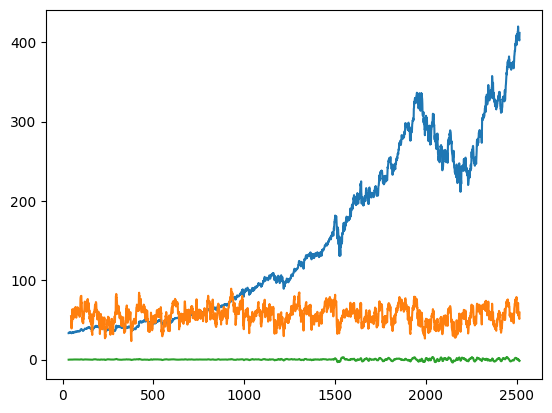

In [12]:
df.adjClose.plot()
df.RSI.plot()
df.MACD_histogram.plot()

In [13]:
# diffs= df.diff()


# Calculate the differences for every column except for the RSI column
df_diff = df.drop(columns=['RSI','MACD','MACD_histogram','MACD_signal']).diff().dropna()

# Calculate the RSI using the adjusted close column
rsi_indicator = ta.momentum.RSIIndicator(close=df['adjClose'], window=14)
df['RSI'] = rsi_indicator.rsi()

# Concatenate the differenced data with the RSI column
diffs = pd.concat([df_diff, df[['RSI','MACD','MACD_histogram','MACD_signal']]], axis=1)

# Display the resulting dataframe
print(diffs)

                 date   open      volume  adjClose    adjHigh     adjLow  \
34    3 days, 0:00:00   0.11  -2323600.0 -0.024560  -0.321816  -0.084688   
35     1 day, 0:00:00   0.23   1962100.0  0.482724   0.465786   0.127033   
36     1 day, 0:00:00   0.72  -3352900.0  0.550474   0.385332   0.724086   
37     1 day, 0:00:00  -0.05   6073600.0 -0.330285  -0.186314  -0.334519   
38    4 days, 0:00:00   0.12 -14468200.0 -0.059282  -0.038110   0.237127   
...               ...    ...         ...       ...        ...        ...   
2512   1 day, 0:00:00  -0.18    470970.0 -2.500000  -0.840000  -0.850000   
2513  4 days, 0:00:00  -4.72   2011420.0 -1.270000  -3.800000  -5.430000   
2514   1 day, 0:00:00  -3.07  -5676843.0 -0.610000  -2.200000  -0.790000   
2515   1 day, 0:00:00  10.02   6758137.0  9.470000  10.540000  11.350000   
33                NaN    NaN         NaN       NaN        NaN        NaN   

        adjOpen   adjVolume        RSI      MACD  MACD_histogram  MACD_signal  
34     

In [14]:
# merged_df.dropna(inplace=True)

<Axes: >

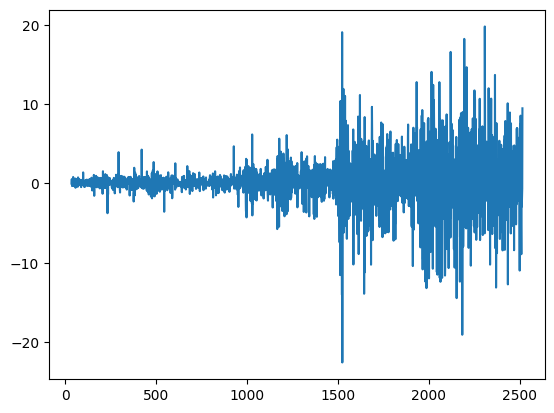

In [15]:
diffs.adjClose.plot()

In [16]:
# Using Pandas sweetviz to generate a report on our dataframe
# report = sv.analyze(diffs)
# report.show_notebook()
# report.show_html('report.html', open_browser=False)

In [17]:
# diffs = merged_df
diffs.corr()

<ipython-input-17-c43c88431770>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,RSI,MACD,MACD_histogram,MACD_signal
open,1.000000,-0.030954,0.279940,0.694319,0.707924,0.999636,-0.030954,0.242931,0.083433,0.232172,0.011663
volume,-0.030954,1.000000,-0.047006,0.095904,-0.156908,-0.030512,1.000000,-0.015466,0.004870,-0.008284,0.007981
adjClose,0.279940,-0.047006,1.000000,0.687902,0.695320,0.279448,-0.047006,0.269538,0.050875,0.168626,-0.001934
adjHigh,0.694319,0.095904,0.687902,1.000000,0.720817,0.694136,0.095904,0.290083,0.082731,0.230894,0.011338
adjLow,0.707924,-0.156908,0.695320,0.720817,1.000000,0.707731,-0.156908,0.287240,0.072978,0.226590,0.002340
adjOpen,0.999636,-0.030512,0.279448,0.694136,0.707731,1.000000,-0.030512,0.240828,0.084885,0.232595,0.013074
adjVolume,-0.030954,1.000000,-0.047006,0.095904,-0.156908,-0.030512,1.000000,-0.015466,0.004870,-0.008284,0.007981
RSI,0.242931,-0.015466,0.269538,0.290083,0.287240,0.240828,-0.015466,1.000000,0.618859,0.505603,0.493198
MACD,0.083433,0.004870,0.050875,0.082731,0.072978,0.084885,0.004870,0.618859,1.000000,0.359191,0.950073
MACD_histogram,0.232172,-0.008284,0.168626,0.230894,0.226590,0.232595,-0.008284,0.505603,0.359191,1.000000,0.050053


In [18]:
# Assuming your data is sorted by time
# Create a lag feature to represent the previous values
for i in range(1, 6):  # Assuming you want to use the first 15 points to predict the next one
    diffs[f'lag_{i}'] = diffs['adjClose'].shift(i)


In [19]:
diffs.head(10)

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,RSI,MACD,MACD_histogram,MACD_signal,lag_1,lag_2,lag_3,lag_4,lag_5
34,"3 days, 0:00:00",0.11,-2323600.0,-0.024560,-0.321816,-0.084688,0.093157,-2323600.0,NaN,0.215871,-0.216820,0.432691,NaN,NaN,NaN,NaN,NaN
35,"1 day, 0:00:00",0.23,1962100.0,0.482724,0.465786,0.127033,0.194783,1962100.0,NaN,0.195540,-0.189721,0.385261,-0.024560,NaN,NaN,NaN,NaN
36,"1 day, 0:00:00",0.72,-3352900.0,0.550474,0.385332,0.724086,0.609756,-3352900.0,NaN,0.221296,-0.131172,0.352468,0.482724,-0.024560,NaN,NaN,NaN
37,"1 day, 0:00:00",-0.05,6073600.0,-0.330285,-0.186314,-0.334519,-0.042344,6073600.0,NaN,0.212605,-0.111890,0.324495,0.550474,0.482724,-0.024560,NaN,NaN
38,"4 days, 0:00:00",0.12,-14468200.0,-0.059282,-0.038110,0.237127,0.101626,-14468200.0,NaN,0.198645,-0.100681,0.299325,-0.330285,0.550474,0.482724,-0.024560,NaN
39,"1 day, 0:00:00",-0.17,4835500.0,0.042344,-0.008469,0.033875,-0.143970,4835500.0,NaN,0.188821,-0.088403,0.277224,-0.059282,-0.330285,0.550474,0.482724,-0.024560
40,"1 day, 0:00:00",0.03,-2453900.0,-0.254065,-0.127033,-0.304878,0.025407,-2453900.0,NaN,0.158705,-0.094815,0.253520,0.042344,-0.059282,-0.330285,0.550474,0.482724
41,"1 day, 0:00:00",-0.25,17778800.0,0.143970,-0.016938,-0.143970,-0.211721,17778800.0,NaN,0.144786,-0.086987,0.231774,-0.254065,0.042344,-0.059282,-0.330285,0.550474
42,"1 day, 0:00:00",0.55,14495200.0,0.042344,0.601287,0.381098,0.465786,14495200.0,NaN,0.135609,-0.076932,0.212541,0.143970,-0.254065,0.042344,-0.059282,-0.330285
43,"3 days, 0:00:00",-0.15,-6266600.0,0.813008,0.516599,0.287940,-0.127033,-6266600.0,NaN,0.191729,-0.016649,0.208378,0.042344,0.143970,-0.254065,0.042344,-0.059282


In [20]:
diffs['date'] = df['date']
diffs

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,RSI,MACD,MACD_histogram,MACD_signal,lag_1,lag_2,lag_3,lag_4,lag_5
34,2014-04-14,0.11,-2323600.0,-0.024560,-0.321816,-0.084688,0.093157,-2323600.0,NaN,0.215871,-0.216820,0.432691,NaN,NaN,NaN,NaN,NaN
35,2014-04-15,0.23,1962100.0,0.482724,0.465786,0.127033,0.194783,1962100.0,NaN,0.195540,-0.189721,0.385261,-0.024560,NaN,NaN,NaN,NaN
36,2014-04-16,0.72,-3352900.0,0.550474,0.385332,0.724086,0.609756,-3352900.0,NaN,0.221296,-0.131172,0.352468,0.482724,-0.024560,NaN,NaN,NaN
37,2014-04-17,-0.05,6073600.0,-0.330285,-0.186314,-0.334519,-0.042344,6073600.0,NaN,0.212605,-0.111890,0.324495,0.550474,0.482724,-0.024560,NaN,NaN
38,2014-04-21,0.12,-14468200.0,-0.059282,-0.038110,0.237127,0.101626,-14468200.0,NaN,0.198645,-0.100681,0.299325,-0.330285,0.550474,0.482724,-0.024560,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2024-02-16,-0.18,470970.0,-2.500000,-0.840000,-0.850000,-0.180000,470970.0,52.966283,6.023724,-1.505013,7.528737,-2.930000,3.912833,-8.923656,-5.280329,6.428226
2513,2024-02-20,-4.72,2011420.0,-1.270000,-3.800000,-5.430000,-4.720000,2011420.0,51.746014,5.212936,-1.852641,7.065577,-2.500000,-2.930000,3.912833,-8.923656,-5.280329
2514,2024-02-21,-3.07,-5676843.0,-0.610000,-2.200000,-0.790000,-3.070000,-5676843.0,51.136619,4.469636,-2.076753,6.546389,-1.270000,-2.500000,-2.930000,3.912833,-8.923656
2515,2024-02-22,10.02,6758137.0,9.470000,10.540000,11.350000,10.020000,6758137.0,59.174759,4.591784,-1.563684,6.155468,-0.610000,-1.270000,-2.500000,-2.930000,3.912833


In [21]:
diffs = diffs.drop(0)
diffs

KeyError: '[0] not found in axis'

In [22]:
diffs.dropna()

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,RSI,MACD,MACD_histogram,MACD_signal,lag_1,lag_2,lag_3,lag_4,lag_5
46,2014-05-01,-0.1599,-6671300.0,-0.338754,-0.118564,-0.186230,-0.135417,-6671300.0,54.679944,0.186637,-0.018246,0.204883,-0.093157,-0.304878,0.813008,0.042344,0.143970
47,2014-05-02,0.0699,14629200.0,-0.262534,-0.016938,-0.245596,0.059197,14629200.0,48.799808,0.142866,-0.049614,0.192480,-0.338754,-0.093157,-0.304878,0.813008,0.042344
48,2014-05-05,-0.7900,-20955700.0,-0.220190,-0.592903,-0.304878,-0.669038,-20955700.0,44.479492,0.089380,-0.082480,0.171860,-0.262534,-0.338754,-0.093157,-0.304878,0.813008
49,2014-05-06,-0.2300,4651500.0,-0.313347,-0.245512,-0.296409,-0.194783,4651500.0,39.165574,0.021459,-0.120320,0.141779,-0.220190,-0.262534,-0.338754,-0.093157,-0.304878
50,2014-05-07,-0.0700,14632100.0,0.309113,0.135501,-0.372629,-0.059282,14632100.0,46.017097,-0.007340,-0.119296,0.111956,-0.313347,-0.220190,-0.262534,-0.338754,-0.093157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2024-02-15,0.0700,1424335.0,-2.930000,-0.710000,-0.280000,0.070000,1424335.0,55.352256,6.841657,-1.063334,7.904991,3.912833,-8.923656,-5.280329,6.428226,0.059890
2512,2024-02-16,-0.1800,470970.0,-2.500000,-0.840000,-0.850000,-0.180000,470970.0,52.966283,6.023724,-1.505013,7.528737,-2.930000,3.912833,-8.923656,-5.280329,6.428226
2513,2024-02-20,-4.7200,2011420.0,-1.270000,-3.800000,-5.430000,-4.720000,2011420.0,51.746014,5.212936,-1.852641,7.065577,-2.500000,-2.930000,3.912833,-8.923656,-5.280329
2514,2024-02-21,-3.0700,-5676843.0,-0.610000,-2.200000,-0.790000,-3.070000,-5676843.0,51.136619,4.469636,-2.076753,6.546389,-1.270000,-2.500000,-2.930000,3.912833,-8.923656


In [23]:
import numpy as np
np.where(diffs.adjClose >=0 ,1,0 )

array([0, 1, 1, ..., 0, 1, 0])

In [24]:
import numpy as np
diffs['target'] =np.where(diffs.adjClose >=0 ,1,0 )
diffs.head()

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,RSI,MACD,MACD_histogram,MACD_signal,lag_1,lag_2,lag_3,lag_4,lag_5,target
34,2014-04-14,0.11,-2323600.0,-0.024560,-0.321816,-0.084688,0.093157,-2323600.0,NaN,0.215871,-0.216820,0.432691,NaN,NaN,NaN,NaN,NaN,0
35,2014-04-15,0.23,1962100.0,0.482724,0.465786,0.127033,0.194783,1962100.0,NaN,0.195540,-0.189721,0.385261,-0.024560,NaN,NaN,NaN,NaN,1
36,2014-04-16,0.72,-3352900.0,0.550474,0.385332,0.724086,0.609756,-3352900.0,NaN,0.221296,-0.131172,0.352468,0.482724,-0.024560,NaN,NaN,NaN,1
37,2014-04-17,-0.05,6073600.0,-0.330285,-0.186314,-0.334519,-0.042344,6073600.0,NaN,0.212605,-0.111890,0.324495,0.550474,0.482724,-0.024560,NaN,NaN,0
38,2014-04-21,0.12,-14468200.0,-0.059282,-0.038110,0.237127,0.101626,-14468200.0,NaN,0.198645,-0.100681,0.299325,-0.330285,0.550474,0.482724,-0.02456,NaN,0


In [25]:
diffs.dropna(inplace=True)
diffs


,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,RSI,MACD,MACD_histogram,MACD_signal,lag_1,lag_2,lag_3,lag_4,lag_5,target
46,2014-05-01,-0.1599,-6671300.0,-0.338754,-0.118564,-0.186230,-0.135417,-6671300.0,54.679944,0.186637,-0.018246,0.204883,-0.093157,-0.304878,0.813008,0.042344,0.143970,0
47,2014-05-02,0.0699,14629200.0,-0.262534,-0.016938,-0.245596,0.059197,14629200.0,48.799808,0.142866,-0.049614,0.192480,-0.338754,-0.093157,-0.304878,0.813008,0.042344,0
48,2014-05-05,-0.7900,-20955700.0,-0.220190,-0.592903,-0.304878,-0.669038,-20955700.0,44.479492,0.089380,-0.082480,0.171860,-0.262534,-0.338754,-0.093157,-0.304878,0.813008,0
49,2014-05-06,-0.2300,4651500.0,-0.313347,-0.245512,-0.296409,-0.194783,4651500.0,39.165574,0.021459,-0.120320,0.141779,-0.220190,-0.262534,-0.338754,-0.093157,-0.304878,0
50,2014-05-07,-0.0700,14632100.0,0.309113,0.135501,-0.372629,-0.059282,14632100.0,46.017097,-0.007340,-0.119296,0.111956,-0.313347,-0.220190,-0.262534,-0.338754,-0.093157,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2024-02-15,0.0700,1424335.0,-2.930000,-0.710000,-0.280000,0.070000,1424335.0,55.352256,6.841657,-1.063334,7.904991,3.912833,-8.923656,-5.280329,6.428226,0.059890,0
2512,2024-02-16,-0.1800,470970.0,-2.500000,-0.840000,-0.850000,-0.180000,470970.0,52.966283,6.023724,-1.505013,7.528737,-2.930000,3.912833,-8.923656,-5.280329,6.428226,0
2513,2024-02-20,-4.7200,2011420.0,-1.270000,-3.800000,-5.430000,-4.720000,2011420.0,51.746014,5.212936,-1.852641,7.065577,-2.500000,-2.930000,3.912833,-8.923656,-5.280329,0
2514,2024-02-21,-3.0700,-5676843.0,-0.610000,-2.200000,-0.790000,-3.070000,-5676843.0,51.136619,4.469636,-2.076753,6.546389,-1.270000,-2.500000,-2.930000,3.912833,-8.923656,0


In [26]:
diffs.drop(['date','open', 'adjClose', 'adjHigh', 'adjLow', 'volume'],axis=1,inplace=True)
diffs.head()


,adjOpen,adjVolume,RSI,MACD,MACD_histogram,MACD_signal,lag_1,lag_2,lag_3,lag_4,lag_5,target
46,-0.135417,-6671300.0,54.679944,0.186637,-0.018246,0.204883,-0.093157,-0.304878,0.813008,0.042344,0.143970,0
47,0.059197,14629200.0,48.799808,0.142866,-0.049614,0.192480,-0.338754,-0.093157,-0.304878,0.813008,0.042344,0
48,-0.669038,-20955700.0,44.479492,0.089380,-0.082480,0.171860,-0.262534,-0.338754,-0.093157,-0.304878,0.813008,0
49,-0.194783,4651500.0,39.165574,0.021459,-0.120320,0.141779,-0.220190,-0.262534,-0.338754,-0.093157,-0.304878,0
50,-0.059282,14632100.0,46.017097,-0.007340,-0.119296,0.111956,-0.313347,-0.220190,-0.262534,-0.338754,-0.093157,1


In [27]:
diffs.dropna(inplace=True)

In [28]:
diffs.head()

,adjOpen,adjVolume,RSI,MACD,MACD_histogram,MACD_signal,lag_1,lag_2,lag_3,lag_4,lag_5,target
46,-0.135417,-6671300.0,54.679944,0.186637,-0.018246,0.204883,-0.093157,-0.304878,0.813008,0.042344,0.143970,0
47,0.059197,14629200.0,48.799808,0.142866,-0.049614,0.192480,-0.338754,-0.093157,-0.304878,0.813008,0.042344,0
48,-0.669038,-20955700.0,44.479492,0.089380,-0.082480,0.171860,-0.262534,-0.338754,-0.093157,-0.304878,0.813008,0
49,-0.194783,4651500.0,39.165574,0.021459,-0.120320,0.141779,-0.220190,-0.262534,-0.338754,-0.093157,-0.304878,0
50,-0.059282,14632100.0,46.017097,-0.007340,-0.119296,0.111956,-0.313347,-0.220190,-0.262534,-0.338754,-0.093157,1


In [29]:
diffs.iloc[:,:-1]

,adjOpen,adjVolume,RSI,MACD,MACD_histogram,MACD_signal,lag_1,lag_2,lag_3,lag_4,lag_5
46,-0.135417,-6671300.0,54.679944,0.186637,-0.018246,0.204883,-0.093157,-0.304878,0.813008,0.042344,0.143970
47,0.059197,14629200.0,48.799808,0.142866,-0.049614,0.192480,-0.338754,-0.093157,-0.304878,0.813008,0.042344
48,-0.669038,-20955700.0,44.479492,0.089380,-0.082480,0.171860,-0.262534,-0.338754,-0.093157,-0.304878,0.813008
49,-0.194783,4651500.0,39.165574,0.021459,-0.120320,0.141779,-0.220190,-0.262534,-0.338754,-0.093157,-0.304878
50,-0.059282,14632100.0,46.017097,-0.007340,-0.119296,0.111956,-0.313347,-0.220190,-0.262534,-0.338754,-0.093157
...,...,...,...,...,...,...,...,...,...,...,...
2511,0.070000,1424335.0,55.352256,6.841657,-1.063334,7.904991,3.912833,-8.923656,-5.280329,6.428226,0.059890
2512,-0.180000,470970.0,52.966283,6.023724,-1.505013,7.528737,-2.930000,3.912833,-8.923656,-5.280329,6.428226
2513,-4.720000,2011420.0,51.746014,5.212936,-1.852641,7.065577,-2.500000,-2.930000,3.912833,-8.923656,-5.280329
2514,-3.070000,-5676843.0,51.136619,4.469636,-2.076753,6.546389,-1.270000,-2.500000,-2.930000,3.912833,-8.923656


In [ ]:
# from pycaret.classification import *
# s = setup(diffs ,target='target',session_id=123)

In [30]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

In [31]:
y = diffs.target.values

X = diffs.iloc[:,:-1].values


In [32]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [33]:
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train.shape}")

X_train_scaled shape: (1852, 11)
y_train shape: (1852,)


In [34]:


# y_train = y_train.reshape(-1,1)

# Create a Sequential model
nn_model = tf.keras.models.Sequential()

# Add the input layer with the specified input dimension
nn_model.add(tf.keras.layers.Dense(units=3, activation="tanh", input_dim=11))

# Add the hidden layers
nn_model.add(tf.keras.layers.Dense(units=9, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=9, activation="tanh"))

# nn_model.add(tf.keras.layers.Dense(units=3, activation="tanh"))
# nn_model.add(tf.keras.layers.Dense(units=9, activation="tanh"))

# Add the output layer with sigmoid activation for binary classification
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model (you can adjust the optimizer, loss, and metrics as needed)
nn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Summary of the model architecture
nn_model.summary()


# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=20, initial_epoch=7)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# {'activation': 'sigmoid',
#  'first_units': 5,
#  'num_layers': 2,
#  'units_0': 1,
#  'units_1': 1,
#  'tuner/epochs': 7,
#  'tuner/initial_epoch': 0,
#  'tuner/bracket': 1,
#  'tuner/round': 0}

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 9)                 36        
                                                                 
 dense_2 (Dense)             (None, 9)                 90        
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 172 (688.00 Byte)
Trainable params: 172 (688.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 8/20
58/58 [==============================] - 1s 2ms/step - loss: 0.6886 - accuracy: 0.5346
Epoch 9/20
58/58 [==============================] - 

Use Autotuner

In [ ]:
# import sklearn as skl
# import matplotlib.pyplot as plt

In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=11))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 2)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [ ]:
!pip install keras_tuner

In [ ]:
# Import the kerastuner library
import keras_tuner as kt
tuner = kt.Hyperband(
    create_model,
    objective="val_loss",
    max_epochs=100,
    hyperband_iterations=2)

In [ ]:
# # Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=65,validation_data=(X_test_scaled,y_test))

In [ ]:
# # Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

In [ ]:
# # Evaluate best model against full test data
# best_model = tuner.get_best_models(1)[0]
# model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")